<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 4 - Semester 7

1. Buatlah model klasifikasi dengan machine learning dari dataset yang diberikan dengan ketentuan :
    - Gunakan metode CRISP-DM secara terurut dan lengkap
    - Gunakan algoritma linear regression, logistic regression, dan K-NN

2. Dari ketiga algoritma yang anda pakai, algoritma yang manakah yang memiliki akurasi paling tinggi?

In [1]:
# Import Library 
import pandas as pd

In [2]:
# Memuat data dengan format csv
df = pd.read_csv('dataset_tm_10k.csv')

In [3]:
# Menampilkan 5 baris teratas dari dataset
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,NaN,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [4]:
# Membuang Kolom "Flight"
df = df.iloc[:,1:]

In [5]:
# Menghitung total jumlah baris yang mewakili total jumlah data keseluruhan
df.shape

(10787, 7)

In [6]:
# Menghitung nilai data yang kosong
df.isna().sum()

Time            873
Length         1343
Airline         582
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [7]:
# Mengecek tipe data setiap kolom
df.dtypes

Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [8]:
# Melakukan import library untuk melakukan imputasi dengan KNN
from sklearn.impute import KNNImputer

In [9]:
# Membuat instance KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [10]:
# Melakukan imputasi dengan KNN pada kolom 'Time' di df
imputed_data = imputer.fit_transform(df[['Time']])

# Mengganti nilai kosong di df_sample dengan data yang telah diimputasi
df.loc[:, 'Time'] = imputed_data

In [11]:
# Menghitung nilai data yang kosong
df.isna().sum()

Time              0
Length         1343
Airline         582
AirportFrom       0
AirportTo         0
DayOfWeek         0
Class             0
dtype: int64

In [12]:
# Melakukan imputasi dengan KNN pada kolom 'Time' di df
imputed_data = imputer.fit_transform(df[['Length']])

# Mengganti nilai kosong di df_sample dengan data yang telah diimputasi
df.loc[:, 'Length'] = imputed_data

In [13]:
# Menghitung nilai data yang kosong
df.isna().sum()

Time             0
Length           0
Airline        582
AirportFrom      0
AirportTo        0
DayOfWeek        0
Class            0
dtype: int64

In [14]:
# Mengimport Library Numpy dan sklearn.impute
import numpy as np
from sklearn.impute import SimpleImputer

In [15]:
# Membuat algoritma SimpleImputer dengan strategi 'most_frequent'
modeImputer = SimpleImputer(strategy='most_frequent')

# Melakukan imputasi dengan SimpleImputer
imputed_data = modeImputer.fit_transform(df['Airline'].values.reshape(-1, 1))

# Memperbaharui data pada kolom Airline dengan data yang telah diimputasi pada imputed_data
df['Airline'] = imputed_data.flatten()

In [16]:
# Mengecek nilai unik dari variabel imputed_data
np.unique(imputed_data)

array(['9E', 'AA', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ',
       'OH', 'OO', 'UA', 'US', 'WN', 'XE', 'YV'], dtype=object)

In [17]:
# Mengecek apakah ada data kosong pada kolom Airline
df['Airline'].isna().any()

False

In [18]:
# Menghitung nilai data yang kosong
df.isna().sum()

Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [19]:
# Menampilkan 5 baris teratas dari dataset
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,870.0,180.0,WN,IAH,PHX,5,0
1,365.0,66.0,OO,DSM,MKE,2,0
2,740.0,257.0,DL,SEA,CVG,7,0
3,595.0,235.0,WN,SNA,MDW,7,1
4,530.0,133.0,CO,IAH,MCO,6,1


### Linear Regression

In [20]:
# Scaling
from sklearn.preprocessing import RobustScaler

In [21]:
# Membuat instans dari RobustScaler
scaler = RobustScaler()

# Menggunakan scaler untuk mentransformasi dan mengubah skala kolom 'Time' dan 'Length' dalam DataFrame
df[['Time', 'Length']] = scaler.fit_transform(df[['Time', 'Length']])

# Menampilkan 5 baris teratas dari dataset setelah proses pengubahan skala
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.157127,0.785714,WN,IAH,PHX,5,0
1,-1.033911,-0.842857,OO,DSM,MKE,2,0
2,-0.149477,1.885714,DL,SEA,CVG,7,0
3,-0.491458,1.571429,WN,SNA,MDW,7,1
4,-0.644760,0.114286,CO,IAH,MCO,6,1


In [22]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df[['Time']]
y = df['Class']

In [23]:
# Membagi dataset ke data latih dan data uji

# Import fungsi train_test_split untuk membagi data dari libray sklearn dan modul model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [24]:
# Memanggil fungsi LinearRegression
from sklearn.linear_model import LinearRegression

In [25]:
# Memanggil objek LinearRegression ke dalam variabel mlr
lr = LinearRegression()

# Melatih model
lr.fit(X_train, y_train)

LinearRegression()

In [26]:
# Memprediksi model
y_pred_lr = lr.predict(X_test)
# Nilai prediksi
print("Prediction for test set: {}".format(y_pred_lr))

Prediction for test set: [0.35403114 0.44670824 0.53691394 ... 0.45125022 0.39555048 0.48995755]


In [27]:
# Membandingkan nilai sebenarnya dengan nilai prediksi menggunakan linear regression
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
lr_diff.head()

,Actual value,Predicted value
7823,1,0.354031
6132,0,0.446708
9949,0,0.536914
10440,0,0.519367
9097,1,0.447944


In [28]:
# Menerapkan threshold pada variabel y_pred_lr ke dalam variabel y_predict_class
y_predict_class = [1 if prob > 0.5 else 0 for prob in y_pred_lr]

In [29]:
# Import Library
from sklearn.metrics import accuracy_score

# Menghitung Akurasi
print("Accuracy:"
      , round(accuracy_score(y_test, y_predict_class), 2)) # Membulatkan nilai akurasi menjadi tiga angka di belakang koma

Accuracy: 0.56


### Logistic Regression

In [30]:
# Membuat copy dari dataset df
df_2 = df.copy()

In [31]:
# Menampilkan 5 baris teratas dari dataset
df_2.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.157127,0.785714,WN,IAH,PHX,5,0
1,-1.033911,-0.842857,OO,DSM,MKE,2,0
2,-0.149477,1.885714,DL,SEA,CVG,7,0
3,-0.491458,1.571429,WN,SNA,MDW,7,1
4,-0.644760,0.114286,CO,IAH,MCO,6,1


In [32]:
# Membuat instans dari RobustScaler
scaler = RobustScaler()

# Menggunakan scaler untuk mentransformasi dan mengubah skala kolom 'Time' dan 'Length' dalam DataFrame
df_2[['Time', 'Length']] = scaler.fit_transform(df_2[['Time', 'Length']])

# Menampilkan 5 baris teratas dari dataset setelah proses pengubahan skala
df_2.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.157127,0.785714,WN,IAH,PHX,5,0
1,-1.033911,-0.842857,OO,DSM,MKE,2,0
2,-0.149477,1.885714,DL,SEA,CVG,7,0
3,-0.491458,1.571429,WN,SNA,MDW,7,1
4,-0.644760,0.114286,CO,IAH,MCO,6,1


In [33]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

In [34]:
# Encoding Kolom Kategori
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_2[cat_col] = df_2[cat_col].apply(le.fit_transform)

In [35]:
# Menampilkan 5 baris teratas dari dataset
df_2.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.157127,0.785714,15,125,199,4,0
1,-1.033911,-0.842857,12,76,170,1,0
2,-0.149477,1.885714,5,235,64,6,0
3,-0.491458,1.571429,15,245,162,6,1
4,-0.644760,0.114286,4,125,160,5,1


In [36]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df_2.iloc[:,0:-1].values
y = df_2.iloc[:,-1].values

In [37]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [38]:
# Membuat Model - LogisticRegression
from sklearn.linear_model import LogisticRegression

In [39]:
reg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [40]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [41]:
# Membuat Confusion Matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1380,  443],
       [ 953,  461]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

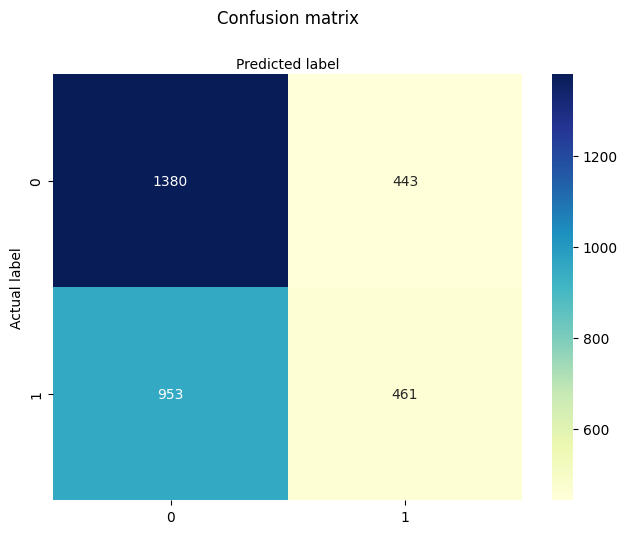

In [42]:
# Visualisasi Confusion Matrix dengan Heatmap

# Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # Label kelas yang akan ditampilkan pada sumbu x dan y
fig, ax = plt.subplots() #Membuat objek gambar dan sumbu menggunakan
tick_marks = np.arange(len(class_names)) # Membuat array dengan rentang jumlah kelas yang ada

# Menentukan tanda-tanda pada sumbu x dan y sesuai dengan array yang telah dibuat
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Membuat Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix) #Parameter yang akan divisualisasi
            , annot=True # Menampilkan nilai di dalam kotak heatmap
            , cmap="YlGnBu" # Skema warna pada heatmap, "YlGnBu" adalah kombinasi antara Yellow (Kuning), Green (Hijau), dan Blue (Biru).
            ,fmt='g') #Mengatur format angka menjadi notasi umum (general notation)

# Mengatur posisi label sumbu x ke bagian atas heatmap
ax.xaxis.set_label_position("top")

# Mengatur tampilan grafik agar lebih rapi.
plt.tight_layout()

# Mengatur judul grafik, label pada sumbu y dan x
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
# Import library
from sklearn.metrics import classification_report

# Mendefinisikan nama kelas dalam array
target_names = ['Not Delayed', 'Delayed']

print(classification_report(y_test # Array target yang berisi label aktual
                            , y_pred # Array target yang berisi label prediksi
                            , target_names=target_names)) #Memberikan nama kelas yang akan ditampilkan

              precision    recall  f1-score   support

 Not Delayed       0.59      0.76      0.66      1823
     Delayed       0.51      0.33      0.40      1414

    accuracy                           0.57      3237
   macro avg       0.55      0.54      0.53      3237
weighted avg       0.56      0.57      0.55      3237



In [44]:
import matplotlib.pyplot as plt

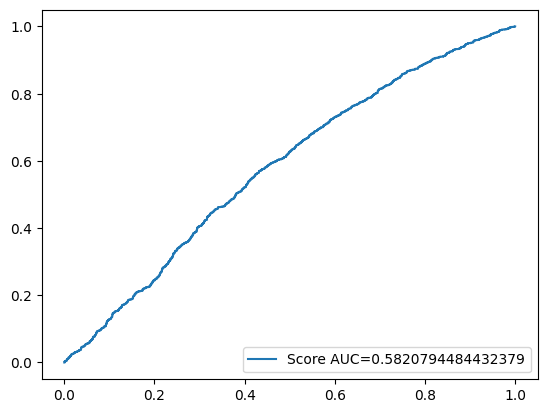

In [45]:
# Memperoleh probabilitas prediksi kelas positif (y=1) dari model klasifikasi reg untuk data uji (X_test)
y_pred_proba = reg.predict_proba(X_test)[::,1]

# Menghitung false positive rate (fpr), true positive rate (tpr), dan threshold yang terkait dengan kurva ROC.
fpr, tpr, _ = metrics.roc_curve(y_test, #Label aktual
                                y_pred_proba)

# Menghitung nilai AUC dari kurva ROC
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Membuat plot untuk kurva ROC
plt.plot(fpr,tpr
         ,label="Score AUC="+str(auc)) #Label "Score AUC" ditambahkan ke legenda untuk menampilkan nilai AUC di grafik

# Menampilkan legenda di lokasi keempat (kanan bawah) pada grafik
plt.legend(loc=4)

# Menampilkan grafik
plt.show()

### K-NN

In [46]:
# Membuat copy dari dataset df
df_3 = df.copy()

In [47]:
# Menampilkan 5 baris teratas dari dataset
df_3.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.157127,0.785714,WN,IAH,PHX,5,0
1,-1.033911,-0.842857,OO,DSM,MKE,2,0
2,-0.149477,1.885714,DL,SEA,CVG,7,0
3,-0.491458,1.571429,WN,SNA,MDW,7,1
4,-0.644760,0.114286,CO,IAH,MCO,6,1


In [48]:
# Scaling
from sklearn.preprocessing import RobustScaler

In [49]:
# Membuat instans dari RobustScaler
scaler = RobustScaler()

# Menggunakan scaler untuk mentransformasi dan mengubah skala kolom 'Time' dan 'Length' dalam DataFrame
df_3[['Time', 'Length']] = scaler.fit_transform(df_3[['Time', 'Length']])

# Menampilkan 5 baris teratas dari dataset setelah proses pengubahan skala
df_3.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.157127,0.785714,WN,IAH,PHX,5,0
1,-1.033911,-0.842857,OO,DSM,MKE,2,0
2,-0.149477,1.885714,DL,SEA,CVG,7,0
3,-0.491458,1.571429,WN,SNA,MDW,7,1
4,-0.644760,0.114286,CO,IAH,MCO,6,1


In [50]:
# Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

In [51]:
# Encoding Kolom Kategori
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_3[cat_col] = df_3[cat_col].apply(le.fit_transform)

In [52]:
# Menampilkan 5 baris teratas dari dataset
df_3.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,0.157127,0.785714,15,125,199,4,0
1,-1.033911,-0.842857,12,76,170,1,0
2,-0.149477,1.885714,5,235,64,6,0
3,-0.491458,1.571429,15,245,162,6,1
4,-0.644760,0.114286,4,125,160,5,1


In [53]:
# Membuat variabel independen (X) dan variabel dependen (y)
X = df_3.iloc[:,0:-1].values
y = df_3.iloc[:,-1].values

In [54]:
# Membagi dataset ke data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [55]:
# Membuat Model - Import Library
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [56]:
knn = KNeighborsClassifier(n_neighbors= 3) # Menentukan jumlah tetangga terdekat (nearest neighbors)

# Melatih model
knn.fit(X_train, y_train)

# Melakukan validasi silang dengan membagi data pelatihan menjadi 5 lipatan (folds)
k = KFold(n_splits = 5)

# Menghitung skor akurasi untuk setiap lipatan menggunakan metode validasi silang yang telah ditentukan
score = cross_val_score(knn
                        , X_train, y_train
                        , scoring = 'accuracy' #Parameter yang ingin digunakan
                        , cv = k).mean() # cv=k -> jumlah lipatan, .mean() -> menghitung rata-rata skor akurasi

# Mencetak skor akurasi pada set data pelatihan dengan pembulatan ke 3 desimal
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.556


In [57]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.546


In [58]:
from sklearn.metrics import classification_report
target_names = ['Not Delayed', 'Delayed']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.60      0.61      0.60      1823
     Delayed       0.48      0.47      0.47      1414

    accuracy                           0.55      3237
   macro avg       0.54      0.54      0.54      3237
weighted avg       0.55      0.55      0.55      3237



In [59]:
# Membuat list kosong dalam variabel accuracy
accuracy = []

# Membuat loop dengan rentang nilai i dari 1-14 (Exclude 15)
# Loop akan menguji setiap n dari 1-14 untuk mencari n dengan akurasi yang paling tinggi

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(y_test, pred_i)

    # Menyimpan skor akurasi pada setiap iterasi ke dalam list "accuracy"
    accuracy.append(accuracy_i)

In [60]:
import matplotlib.pyplot as plt

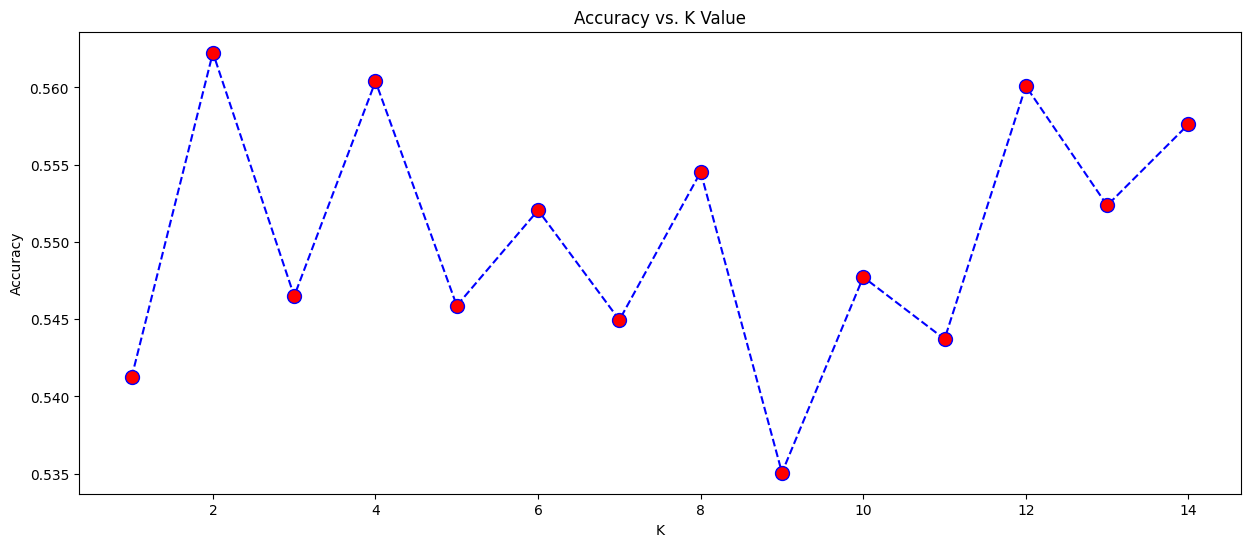

In [61]:
# Melihat akurasi dari setiap iterasi pada line chart
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [62]:
# Dapat dilihat dari grafik di atas bahwa akurasi paling tinggi didapatkan dengan n = 14
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [63]:
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {round(accuracy_knn * 100, 2)}%")

Accuracy on the test set: 56.04%


In [64]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Delayed       0.58      0.77      0.66      1823
     Delayed       0.49      0.29      0.37      1414

    accuracy                           0.56      3237
   macro avg       0.54      0.53      0.52      3237
weighted avg       0.54      0.56      0.53      3237



In [65]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

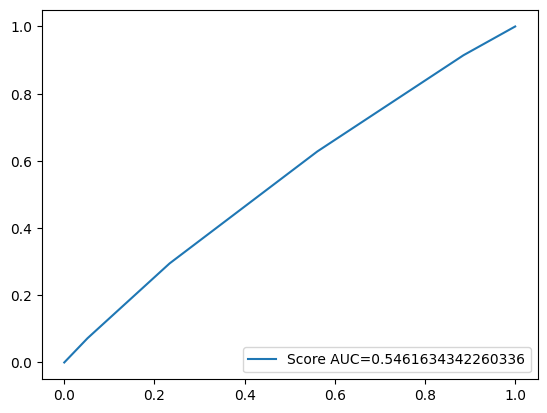

In [66]:
# Memperoleh probabilitas prediksi kelas positif (y=1) dari model klasifikasi KNN untuk data uji (X_test)
y_pred_proba = knn.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Score AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### Kesimpulan

In [67]:
print(f"Accuracy Linear Regression: {round(accuracy_score(y_test, y_predict_class) * 100, 2)}%")
print(f"Accuracy Logistic Regression: {round(auc * 100, 2)}%")
print(f"Accuracy K-NN: {round(accuracy_knn * 100, 2)}%")

Accuracy Linear Regression: 56.19%
Accuracy Logistic Regression: 54.62%
Accuracy K-NN: 56.04%


Jadi, dari ketiga algoritma yang digunakan, algoritma yang memiliki akurasi tertinggi adalah algoritma Linear Regresi dengan akurasi sebesar 56.19%